# A sample example to tune xgboost classifier showing a complex search space definition

In [1]:
from mango.tuner import Tuner

In [2]:
from scipy.stats import uniform

param_dict = {"learning_rate": uniform(0, 1),
              "gamma": uniform(0, 5),
              "max_depth": range(1,10),
              "n_estimators": range(1,300),
               "booster":['gbtree','gblinear','dart']
             }

# userObjective

In [3]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.datasets import load_wine

X, Y = load_wine(return_X_y=True)

count_called = 1

def objective_Xgboost(args_list):
    global X, Y, count_called
    
    print('count_called:',count_called)
    
    count_called = count_called + 1
    results = []
    for hyper_par in args_list:
        clf = XGBClassifier(**hyper_par)
        result = cross_val_score(clf, X, Y, scoring='accuracy').mean()
        results.append(result)
    return results

In [4]:
conf_Dict = dict()
conf_Dict['batch_size'] = 1
conf_Dict['num_iteration'] = 40
#conf_Dict['domain_size'] = 10000

# Defining Tuner

In [5]:
tuner_user = Tuner(param_dict, objective_Xgboost,conf_Dict)

Calculated Domain Size: 403650000


In [6]:
tuner_user.getConf()

{'param_dict': {'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a21a7a898>,
  'gamma': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a21a7add8>,
  'max_depth': range(1, 10),
  'n_estimators': range(1, 300),
  'booster': ['gbtree', 'gblinear', 'dart']},
 'userObjective': <function __main__.objective_Xgboost(args_list)>,
 'domain_size': 50000,
 'initial_random': 1,
 'num_iteration': 40,
 'objective': 'maximize',
 'batch_size': 1}

In [7]:
import time
start_time = time.clock()

results = tuner_user.maximize()

end_time = time.clock()


print(end_time - start_time)

count_called: 1
count_called: 2
count_called: 3
count_called: 4
count_called: 5
count_called: 6
count_called: 7
count_called: 8
count_called: 9
count_called: 10
count_called: 11
count_called: 12
count_called: 13
count_called: 14
count_called: 15
count_called: 16
count_called: 17
count_called: 18
count_called: 19
count_called: 20
count_called: 21
count_called: 22
count_called: 23
count_called: 24
count_called: 25
count_called: 26
count_called: 27
count_called: 28
count_called: 29
count_called: 30
count_called: 31
count_called: 32
count_called: 33
count_called: 34
count_called: 35
count_called: 36
count_called: 37
count_called: 38
count_called: 39
count_called: 40
count_called: 41
221.520671


# Inspect the results

In [8]:
print('best hyper parameters:',results['best_params'])
print('best objective:',results['best_objective'])

best hyper parameters: {'booster': 'dart', 'gamma': 0.02910878825610752, 'learning_rate': 0.09064527628187469, 'max_depth': 1, 'n_estimators': 266}
best objective: 0.9220306513409962


In [9]:
print('Sample hyper parameters tried:',len(results['params_tried']))
print(results['params_tried'][:2])

Sample hyper parameters tried: 41
[{'booster': 'dart', 'gamma': 0.7209255899800238, 'learning_rate': 0.8022657797849247, 'max_depth': 3, 'n_estimators': 136}, {'booster': 'dart', 'gamma': 0.44305101935746716, 'learning_rate': 0.6934024551520116, 'max_depth': 4, 'n_estimators': 225}]


In [10]:
print('Sample objective values',len(results['objective_values']))
print(results['objective_values'][:5])

Sample objective values 41
[0.9109195402298851, 0.9109195402298851, 0.8827586206896552, 0.8716475095785441, 0.8942528735632184]


# Plotting the actual variation in objective values of the tried results

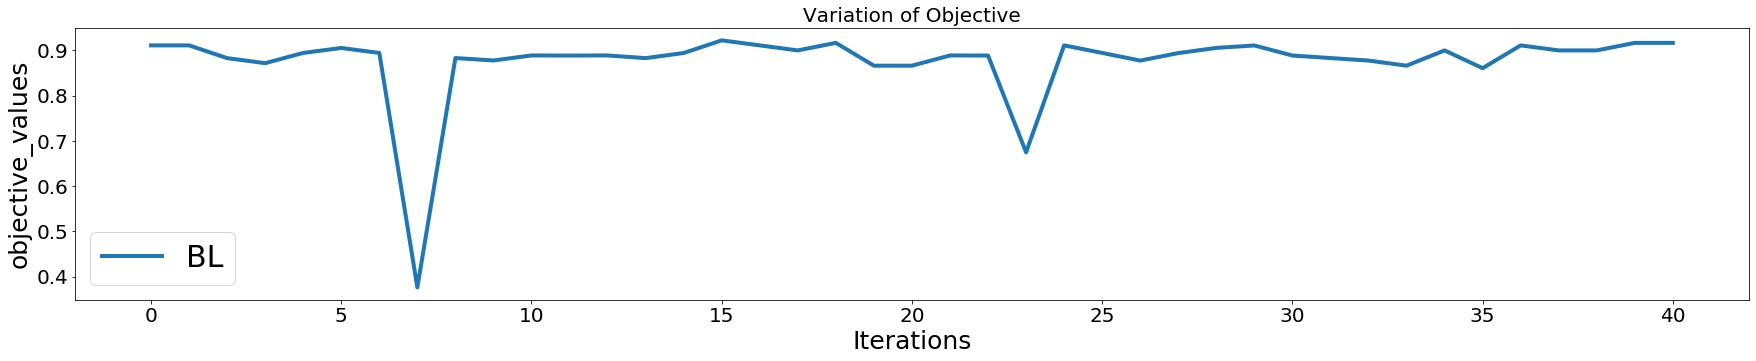

In [12]:
Size = 201 

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation of Max objective values of the tried results

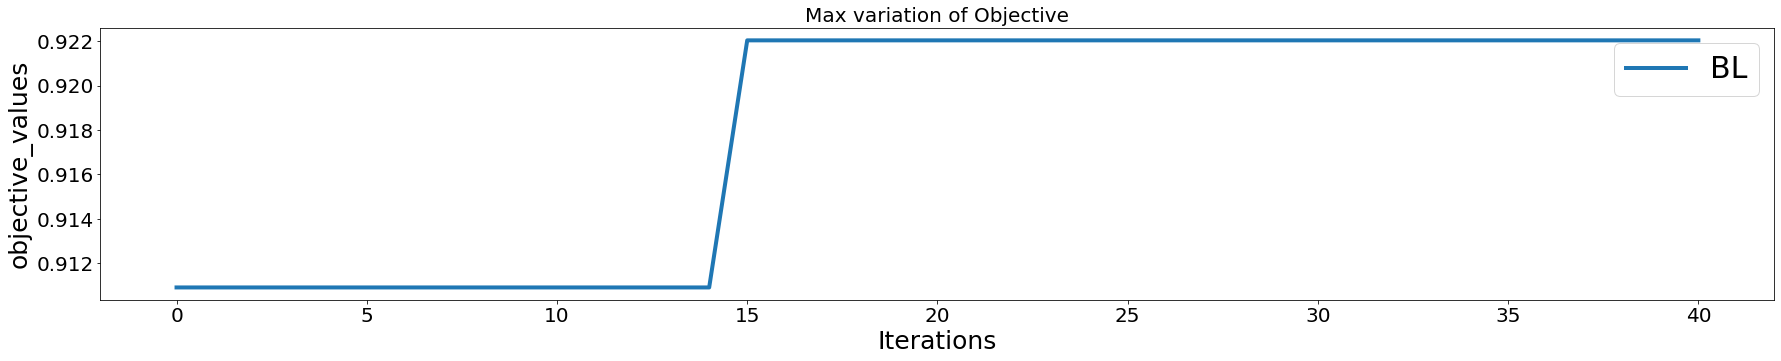

In [13]:
Size = 201 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# See the Result

In [14]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

{   'best_objective': 0.9220306513409962,
    'best_params': {   'booster': 'dart',
                       'gamma': 0.02910878825610752,
                       'learning_rate': 0.09064527628187469,
                       'max_depth': 1,
                       'n_estimators': 266},
    'objective_values': [   0.9109195402298851,
                            0.9109195402298851,
                            0.8827586206896552,
                            0.8716475095785441,
                            0.8942528735632184,
                            0.9051724137931035,
                            0.8942528735632185,
                            0.3762452107279694,
                            0.8829501915708812,
                            0.8775862068965518,
                            0.8886973180076628,
                            0.8885057471264367,
                            0.8886973180076628,
                            0.8827586206896552,
                            0.8940613026819925